Classificação de imagens com o MNIST

In [28]:
from __future__ import absolute_import, division, print_function, unicode_literals

# TensorFlow e tf.keras
import tensorflow as tf
from tensorflow import keras

# Librariesauxiliares
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

fashion_mnist = keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

2.0.0


In [29]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [30]:
train_images.shape

(60000, 28, 28)

In [31]:
len(train_labels)

60000

In [32]:
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [33]:
test_images.shape

(10000, 28, 28)

In [34]:
len(test_labels)

10000

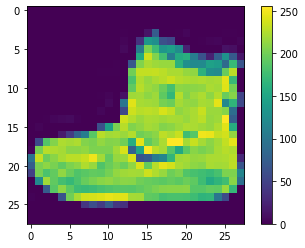

In [35]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

Pré processamento dos dados

In [36]:
train_images = train_images / 255.0

test_images = test_images / 255.0

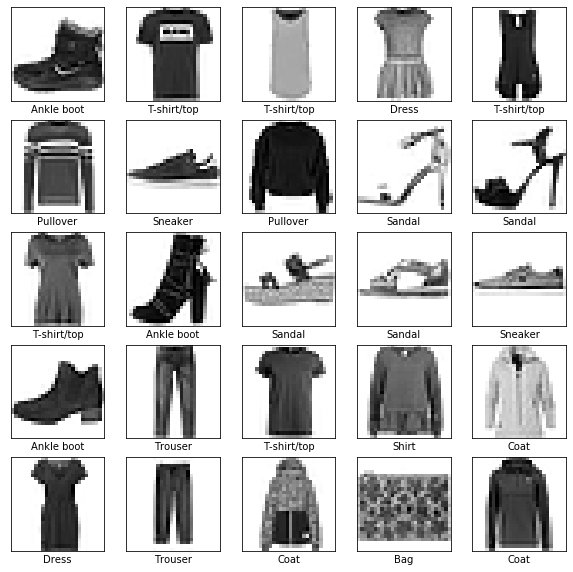

In [37]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

Criação do modelo - keras.layers.Flatten transforma o formato do array de imagem em uma dimensão

In [38]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [39]:
model.fit(train_images, train_labels, epochs=10)

Train on 60000 samples
Epoch 1/10
60000/60000 [==============================] - 3s 52us/sample - loss: 0.4944 - accuracy: 0.8242
Epoch 2/10
60000/60000 [==============================] - 3s 48us/sample - loss: 0.3743 - accuracy: 0.8656
Epoch 3/10
60000/60000 [==============================] - 3s 51us/sample - loss: 0.3350 - accuracy: 0.8787
Epoch 4/10
60000/60000 [==============================] - 3s 50us/sample - loss: 0.3139 - accuracy: 0.8850
Epoch 5/10
60000/60000 [==============================] - 3s 49us/sample - loss: 0.2941 - accuracy: 0.8914
Epoch 6/10
60000/60000 [==============================] - 3s 48us/sample - loss: 0.2809 - accuracy: 0.8962
Epoch 7/10
60000/60000 [==============================] - 3s 48us/sample - loss: 0.2689 - accuracy: 0.9000
Epoch 8/10
60000/60000 [==============================] - 3s 47us/sample - loss: 0.2587 - accuracy: 0.9036
Epoch 9/10
60000/60000 [==============================] - 3s 54us/sample - loss: 0.2490 - accuracy: 0.9080
Epoch 10/10
60

In [40]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

print('\nTest accuracy:', test_acc)

10000/1 - 0s - loss: 0.2799 - accuracy: 0.8815

Test accuracy: 0.8815


In [41]:
predictions = model.predict(test_images)

In [42]:
predictions[0]

array([5.0590825e-07, 3.6491923e-07, 2.0349300e-09, 3.1151089e-08,
       7.0457354e-08, 1.1419694e-02, 1.1704950e-07, 3.0532284e-02,
       7.3220847e-09, 9.5804691e-01], dtype=float32)

np.argmax(predictions[x]) - Passa uma imagem e ele retorna a label a qual ela pertence

In [43]:
np.argmax(predictions[0])

9

In [44]:
test_labels[0]

9

In [45]:
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array[i], true_label[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

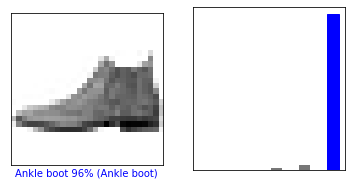

In [46]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions,  test_labels)
plt.show()

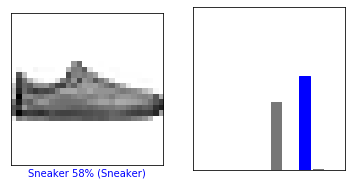

In [47]:
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions,  test_labels)
plt.show()

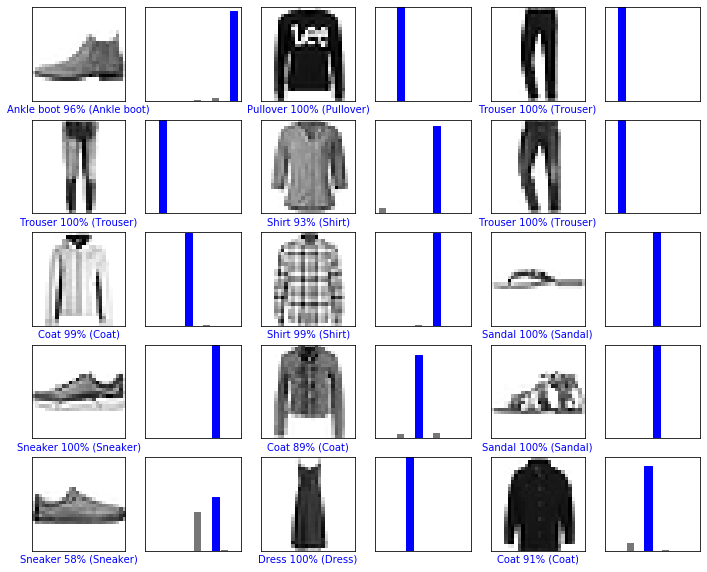

In [48]:
# Plota o primeiro X test images, e as labels preditas, e as labels verdadeiras.
# Colore as predições corretas de azul e as incorretas de vermelho.
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions, test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions, test_labels)
plt.show()

In [49]:
# Grab an image from the test dataset.
img = test_images[0]

print(img.shape)

(28, 28)


In [50]:
# Adiciona a imagem em um batch que possui um só membro.
img = (np.expand_dims(img,0))

print(img.shape)

(1, 28, 28)


In [51]:
predictions_single = model.predict(img)

print(predictions_single)

[[5.05908247e-07 3.64919941e-07 2.03493777e-09 3.11510888e-08
  7.04573537e-08 1.14196725e-02 1.17049716e-07 3.05322986e-02
  7.32211269e-09 9.58046913e-01]]


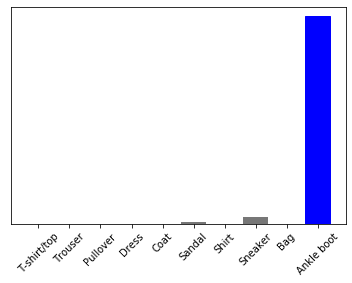

In [52]:
plot_value_array(0, predictions_single, test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)

In [53]:
np.argmax(predictions_single[0])

9